
## Karan Pillay

# Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from sklearn.metrics import roc_auc_score

Using TensorFlow backend.


In [2]:
data = pd.read_csv("Data.csv")
data.head(10)

/Users/diemnguyen/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (328,336) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ActIntAmusementParkVisit,ActIntZooVisit,ActIntWineLovers,ActIntDoityourselfers,ActIntHomeImproveSpenders,ActIntHuntingEnthusiasts,BuyerLuxuryStoreShop,LifestyleMedicalPolicy,ActIntDigitalMagNewspaper,ActIntAttendsEducationProg,...,MortgageLoanType,ESTCURRMTHLYMORTGPAYMTRNG,MosaicGlobalZip4,PresenceOfCreditCard,InterestInCrafts,InterestInGourmetCooking,ComputersPeripherals,HiTechOwner,InternetOnlineSubscriber,Flag
0,26.0,68.0,65.0,37.0,53.0,41.0,40.0,69.0,78.0,67.0,...,NaN,0U,E,U,Y,Y,Y,Y,Y,0
1,47.0,46.0,2.0,31.0,9.0,68.0,5.0,14.0,48.0,10.0,...,C,1M,B,Y,U,U,Y,Y,Y,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
5,15.0,47.0,66.0,37.0,37.0,22.0,53.0,51.0,62.0,20.0,...,NaN,3N,F,U,U,Y,Y,Y,Y,0
6,20.0,31.0,63.0,11.0,46.0,42.0,42.0,72.0,49.0,42.0,...,NaN,1E,F,U,U,U,Y,Y,Y,0
7,47.0,43.0,99.0,63.0,80.0,69.0,38.0,93.0,40.0,31.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [3]:
data.describe()

,ActIntAmusementParkVisit,ActIntZooVisit,ActIntWineLovers,ActIntDoityourselfers,ActIntHomeImproveSpenders,ActIntHuntingEnthusiasts,BuyerLuxuryStoreShop,LifestyleMedicalPolicy,ActIntDigitalMagNewspaper,ActIntAttendsEducationProg,...,AmericanOrigin,EuropeanOrigin,AsianOrigin,ForeignvsDomestic,MorevsLessExpensive,LuxuryvsMidPriced,NewvsUsed,MidRangeCarvsTrucks,TimeZone,Flag
count,23372.000000,23372.000000,22008.000000,23372.000000,23372.000000,23372.000000,23372.000000,23372.000000,23372.000000,23372.000000,...,22884.000000,22884.000000,22884.000000,22884.000000,22884.000000,22884.000000,22884.000000,22884.000000,38473.000000,39508.000000
mean,41.231003,43.889184,66.429707,51.038764,60.268740,49.773918,42.507188,65.613084,43.929488,38.547193,...,5138.119516,697.029060,4164.854090,11150.134461,10212.820224,11444.963206,10290.701189,9185.231909,2.910535,0.103776
std,21.925803,23.925296,26.133180,26.863314,26.244229,25.102044,18.869699,26.813715,22.259598,28.324597,...,1371.135985,461.319097,1095.146379,727.108018,668.856507,966.067655,903.668573,855.815963,2.217848,0.304974
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1103.000000,0.000000,270.000000,7931.000000,8060.000000,9088.000000,7777.000000,6233.000000,0.000000,0.000000
25%,23.000000,25.000000,49.000000,31.000000,41.000000,29.000000,31.000000,47.000000,28.000000,13.000000,...,4168.000000,402.000000,3381.000000,10616.000000,9717.000000,10760.000000,9689.000000,8633.000000,2.000000,0.000000
50%,45.000000,44.000000,67.000000,47.000000,62.000000,43.000000,43.000000,68.000000,43.000000,34.000000,...,5134.500000,584.000000,4181.000000,11188.000000,10206.000000,11257.000000,10262.000000,9209.000000,2.000000,0.000000
75%,55.000000,63.000000,93.000000,70.000000,83.000000,70.000000,53.000000,92.000000,61.000000,61.000000,...,6151.000000,848.000000,4963.250000,11693.000000,10676.000000,11983.000000,10843.000000,9704.000000,3.000000,0.000000
max,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,...,9653.000000,7039.000000,7982.000000,13560.000000,13355.000000,15239.000000,15941.000000,11884.000000,9.000000,1.000000


In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39508 entries, 0 to 39507
Columns: 389 entries, ActIntAmusementParkVisit to Flag
dtypes: float64(319), int64(1), object(69)
memory usage: 117.3+ MB
None


In [5]:
#So there are 69 categorical columns in our dataset. 

In [6]:
#print((data[['ActIntAmusementParkVisit']] == 18).sum())

In [7]:
print(data.isnull().sum())

ActIntAmusementParkVisit     16136
ActIntZooVisit               16136
ActIntWineLovers             17500
ActIntDoityourselfers        16136
ActIntHomeImproveSpenders    16136
                             ...  
InterestInGourmetCooking     19722
ComputersPeripherals         19722
HiTechOwner                  19722
InternetOnlineSubscriber     19722
Flag                             0
Length: 389, dtype: int64


### Replaced NaN values with mean of their column values 

In [8]:
data.fillna(data.mean(), inplace=True)
# count the number of NaN values in each column
print(data.isnull().sum())

ActIntAmusementParkVisit         0
ActIntZooVisit                   0
ActIntWineLovers                 0
ActIntDoityourselfers            0
ActIntHomeImproveSpenders        0
                             ...  
InterestInGourmetCooking     19722
ComputersPeripherals         19722
HiTechOwner                  19722
InternetOnlineSubscriber     19722
Flag                             0
Length: 389, dtype: int64


In [9]:
import copy
catg_data = data.select_dtypes(include=['object']).copy()

In [10]:
catg_data.head(10)

,DiscoverPremium,OtherCardPremium,OtherCardRegular,VisaRegular,CDsMoneyMarketCurrently,Vetern,ComputerOrElectronics,HomeAndGarden,EstimatedIncomeRangeV6,LevLatLong,...,MortgageRateType,MortgageLoanType,ESTCURRMTHLYMORTGPAYMTRNG,MosaicGlobalZip4,PresenceOfCreditCard,InterestInCrafts,InterestInGourmetCooking,ComputersPeripherals,HiTechOwner,InternetOnlineSubscriber
0,U,U,U,U,U,U,U,U,D,R,...,NaN,NaN,0U,E,U,Y,Y,Y,Y,Y
1,U,U,Y,U,U,U,U,U,H,R,...,V,C,1M,B,Y,U,U,Y,Y,Y
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,T,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H,T,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,T,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,U,U,U,U,U,U,U,U,J,R,...,NaN,NaN,3N,F,U,U,Y,Y,Y,Y
6,U,U,U,U,U,U,U,U,C,R,...,NaN,NaN,1E,F,U,U,U,Y,Y,Y
7,U,U,U,U,U,U,U,U,E,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,T,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,T,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
catg_data.describe()

,DiscoverPremium,OtherCardPremium,OtherCardRegular,VisaRegular,CDsMoneyMarketCurrently,Vetern,ComputerOrElectronics,HomeAndGarden,EstimatedIncomeRangeV6,LevLatLong,...,MortgageRateType,MortgageLoanType,ESTCURRMTHLYMORTGPAYMTRNG,MosaicGlobalZip4,PresenceOfCreditCard,InterestInCrafts,InterestInGourmetCooking,ComputersPeripherals,HiTechOwner,InternetOnlineSubscriber
count,15165,15165,15165,15165,15165,15165,15165,15165,38618,38688,...,4740,5478,19786,22927,19786,19786,19786,19786,19786,19786
unique,2,2,2,2,2,2,2,2,13,5,...,2,4,46,10,2,2,2,2,2,2
top,U,U,U,U,U,U,U,U,E,R,...,F,C,0U,G,U,U,U,Y,Y,Y
freq,14903,14149,8596,9327,15002,12408,14750,14442,10197,22927,...,4283,2918,5199,6868,10551,17438,13485,13103,12429,12029


In [12]:
#There are total 1302649 Nan Values in categorical columns.

In [13]:
print(catg_data.isnull().values.sum())

1302649


In [14]:
print(catg_data.isnull().sum())

DiscoverPremium             24343
OtherCardPremium            24343
OtherCardRegular            24343
VisaRegular                 24343
CDsMoneyMarketCurrently     24343
                            ...  
InterestInCrafts            19722
InterestInGourmetCooking    19722
ComputersPeripherals        19722
HiTechOwner                 19722
InternetOnlineSubscriber    19722
Length: 69, dtype: int64


In [15]:
data.shape
catg_data.shape

(39508, 69)

In [16]:
#Analysing categorical data

In [17]:
print(catg_data['HiTechOwner'].value_counts())

Y    12429
U     7357
Name: HiTechOwner, dtype: int64


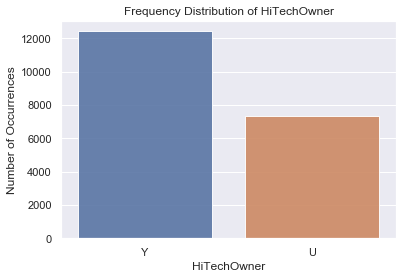

In [18]:
HiTechOwner_count = catg_data['HiTechOwner'].value_counts()
sns.set(style="darkgrid")
sns.barplot(HiTechOwner_count.index, HiTechOwner_count.values, alpha=0.9)
plt.title('Frequency Distribution of HiTechOwner')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('HiTechOwner', fontsize=12)
plt.show()

In [19]:
#getting numeric data

In [20]:
num_df = data._get_numeric_data()
num_df.head()

,ActIntAmusementParkVisit,ActIntZooVisit,ActIntWineLovers,ActIntDoityourselfers,ActIntHomeImproveSpenders,ActIntHuntingEnthusiasts,BuyerLuxuryStoreShop,LifestyleMedicalPolicy,ActIntDigitalMagNewspaper,ActIntAttendsEducationProg,...,AmericanOrigin,EuropeanOrigin,AsianOrigin,ForeignvsDomestic,MorevsLessExpensive,LuxuryvsMidPriced,NewvsUsed,MidRangeCarvsTrucks,TimeZone,Flag
0,26.000000,68.000000,65.000000,37.000000,53.00000,41.000000,40.000000,69.000000,78.000000,67.000000,...,5199.000000,881.00000,3920.00000,11341.000000,9779.000000,11878.000000,10914.000000,9397.000000,1.0,0
1,47.000000,46.000000,2.000000,31.000000,9.00000,68.000000,5.000000,14.000000,48.000000,10.000000,...,3092.000000,1855.00000,5053.00000,12179.000000,10966.000000,13900.000000,11316.000000,8321.000000,1.0,0
2,41.231003,43.889184,66.429707,51.038764,60.26874,49.773918,42.507188,65.613084,43.929488,38.547193,...,5138.119516,697.02906,4164.85409,11150.134461,10212.820224,11444.963206,10290.701189,9185.231909,1.0,1
3,41.231003,43.889184,66.429707,51.038764,60.26874,49.773918,42.507188,65.613084,43.929488,38.547193,...,5138.119516,697.02906,4164.85409,11150.134461,10212.820224,11444.963206,10290.701189,9185.231909,4.0,0
4,41.231003,43.889184,66.429707,51.038764,60.26874,49.773918,42.507188,65.613084,43.929488,38.547193,...,5138.119516,697.02906,4164.85409,11150.134461,10212.820224,11444.963206,10290.701189,9185.231909,2.0,0


In [21]:
catg_data = catg_data.fillna(catg_data['HiTechOwner'].value_counts().index[0])

In [22]:
# We can see there are no columns now with NULL values.

In [23]:
print(catg_data.isnull().values.sum())

0


In [24]:
catg_data.head()

,DiscoverPremium,OtherCardPremium,OtherCardRegular,VisaRegular,CDsMoneyMarketCurrently,Vetern,ComputerOrElectronics,HomeAndGarden,EstimatedIncomeRangeV6,LevLatLong,...,MortgageRateType,MortgageLoanType,ESTCURRMTHLYMORTGPAYMTRNG,MosaicGlobalZip4,PresenceOfCreditCard,InterestInCrafts,InterestInGourmetCooking,ComputersPeripherals,HiTechOwner,InternetOnlineSubscriber
0,U,U,U,U,U,U,U,U,D,R,...,Y,Y,0U,E,U,Y,Y,Y,Y,Y
1,U,U,Y,U,U,U,U,U,H,R,...,V,C,1M,B,Y,U,U,Y,Y,Y
2,Y,Y,Y,Y,Y,Y,Y,Y,C,T,...,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y
3,Y,Y,Y,Y,Y,Y,Y,Y,H,T,...,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y
4,Y,Y,Y,Y,Y,Y,Y,Y,E,T,...,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y


In [25]:
print(catg_data['DiscoverPremium'].value_counts())

Y    24605
U    14903
Name: DiscoverPremium, dtype: int64


In [26]:
print(catg_data['EstimatedIncomeRangeV6'].value_counts())

E    10197
D     6350
F     6087
C     3376
G     3142
B     2740
A     2492
H     1776
Y      890
I      695
J      647
L      605
K      467
U       44
Name: EstimatedIncomeRangeV6, dtype: int64


In [27]:
print(catg_data['EstimatedIncomeRangeV6'].value_counts().count())

14


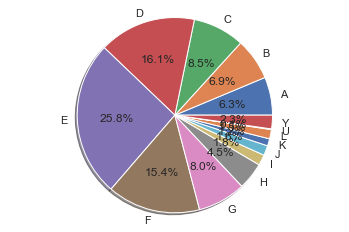

In [28]:
labels = catg_data['EstimatedIncomeRangeV6'].astype('category').cat.categories.tolist()
counts = catg_data['EstimatedIncomeRangeV6'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

In [29]:
replace_map = {'DiscoverPremium': {'Y': 1, 'U': 2}} 
labels = catg_data['DiscoverPremium'].astype('category').cat.categories.tolist()
replace_map_comp = {'DiscoverPremium' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
print(replace_map_comp)
catg_data_replace = catg_data.copy()
catg_data_replace.replace(replace_map_comp, inplace=True)
print(catg_data_replace.head())

{'DiscoverPremium': {'U': 1, 'Y': 2}}
   DiscoverPremium OtherCardPremium OtherCardRegular VisaRegular  \
0                1                U                U           U   
1                1                U                Y           U   
2                2                Y                Y           Y   
3                2                Y                Y           Y   
4                2                Y                Y           Y   

  CDsMoneyMarketCurrently Vetern ComputerOrElectronics HomeAndGarden  \
0                       U      U                     U             U   
1                       U      U                     U             U   
2                       Y      Y                     Y             Y   
3                       Y      Y                     Y             Y   
4                       Y      Y                     Y             Y   

  EstimatedIncomeRangeV6 LevLatLong  ... MortgageRateType MortgageLoanType  \
0                      D          R  ...  

In [30]:
# verifying datatype of Columns 

In [31]:
print(catg_data_replace['DiscoverPremium'].dtypes)

int64


In [32]:
catg_data_replace.head()

,DiscoverPremium,OtherCardPremium,OtherCardRegular,VisaRegular,CDsMoneyMarketCurrently,Vetern,ComputerOrElectronics,HomeAndGarden,EstimatedIncomeRangeV6,LevLatLong,...,MortgageRateType,MortgageLoanType,ESTCURRMTHLYMORTGPAYMTRNG,MosaicGlobalZip4,PresenceOfCreditCard,InterestInCrafts,InterestInGourmetCooking,ComputersPeripherals,HiTechOwner,InternetOnlineSubscriber
0,1,U,U,U,U,U,U,U,D,R,...,Y,Y,0U,E,U,Y,Y,Y,Y,Y
1,1,U,Y,U,U,U,U,U,H,R,...,V,C,1M,B,Y,U,U,Y,Y,Y
2,2,Y,Y,Y,Y,Y,Y,Y,C,T,...,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y
3,2,Y,Y,Y,Y,Y,Y,Y,H,T,...,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y
4,2,Y,Y,Y,Y,Y,Y,Y,E,T,...,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y


### Dropping columns that are not necessary in analysis.

In [33]:
new_catg_data = catg_data_replace.drop(columns=['I2PersonType','I2GenderCode', 'I3PersonType', 'I3GenderCode', 'I4PersonType',
'I4GenderCode',
'I5PersonType',
'I5GenderCode',
'I6PersonType',
'I6GenderCode',
'I7PersonType',
'I7GenderCode',
'I8PersonType',
'I8GenderCode',
'Person6OccupationGroupV2',
'Person7OccupationGroupV2',
'PoliticalAffiliation',
'PoliticalAffiliation2',
'PoliticalAffiliation3',
'PoliticalAffiliation4',
'PoliticalAffiliation7',
'POC03YrsOldGenderV3',
'POC46YrsOldGenderV3',
'POC79YrsOldGenderV3',
'POC1012YrsOldGenderV3',
'POC1315YrsOldGenderV3',
'POC1618YrsOldGenderV3'])
new_catg_data

,DiscoverPremium,OtherCardPremium,OtherCardRegular,VisaRegular,CDsMoneyMarketCurrently,Vetern,ComputerOrElectronics,HomeAndGarden,EstimatedIncomeRangeV6,LevLatLong,...,MortgageRateType,MortgageLoanType,ESTCURRMTHLYMORTGPAYMTRNG,MosaicGlobalZip4,PresenceOfCreditCard,InterestInCrafts,InterestInGourmetCooking,ComputersPeripherals,HiTechOwner,InternetOnlineSubscriber
0,1,U,U,U,U,U,U,U,D,R,...,Y,Y,0U,E,U,Y,Y,Y,Y,Y
1,1,U,Y,U,U,U,U,U,H,R,...,V,C,1M,B,Y,U,U,Y,Y,Y
2,2,Y,Y,Y,Y,Y,Y,Y,C,T,...,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y
3,2,Y,Y,Y,Y,Y,Y,Y,H,T,...,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y
4,2,Y,Y,Y,Y,Y,Y,Y,E,T,...,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39503,2,Y,Y,Y,Y,Y,Y,Y,E,4,...,Y,Y,Y,I,Y,Y,Y,Y,Y,Y
39504,2,Y,Y,Y,Y,Y,Y,Y,Y,T,...,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y
39505,1,U,Y,U,U,U,U,U,F,R,...,F,F,1L,C,Y,U,U,Y,Y,Y
39506,1,U,U,U,U,U,U,U,F,R,...,F,C,1K,F,U,U,U,Y,Y,Y


In [34]:
new_catg_data[new_catg_data.select_dtypes(['object']).columns] = new_catg_data.select_dtypes(['object']).apply(lambda x: x.astype('category'))

In [35]:
#Converting catgorical variables to numerical using .cat.codes so that we can utilize maximum columns in our predictions.

In [36]:
new_catg_data['OtherCardPremium'] = new_catg_data['OtherCardPremium'].cat.codes
new_catg_data['OtherCardRegular'] = new_catg_data['OtherCardRegular'].cat.codes
new_catg_data['VisaRegular'] = new_catg_data['VisaRegular'].cat.codes
new_catg_data['CDsMoneyMarketCurrently'] = new_catg_data['CDsMoneyMarketCurrently'].cat.codes
new_catg_data['Vetern'] = new_catg_data['Vetern'].cat.codes
new_catg_data['ComputerOrElectronics'] = new_catg_data['ComputerOrElectronics'].cat.codes
new_catg_data['HomeAndGarden'] = new_catg_data['HomeAndGarden'].cat.codes
new_catg_data['EstimatedIncomeRangeV6'] = new_catg_data['EstimatedIncomeRangeV6'].cat.codes
new_catg_data['RuralUrbanCountySizeCode'] = new_catg_data['RuralUrbanCountySizeCode'].cat.codes
new_catg_data['ZipLocality'] = new_catg_data['ZipLocality'].cat.codes
new_catg_data['NewHomeownerIndicator6Mos'] = new_catg_data['NewHomeownerIndicator6Mos'].cat.codes
new_catg_data['NewMoverIndicator6Months'] = new_catg_data['NewMoverIndicator6Months'].cat.codes
new_catg_data['I1GenderCode'] = new_catg_data['I1GenderCode'].cat.codes
new_catg_data['MaritalStatus1'] = new_catg_data['MaritalStatus1'].cat.codes
new_catg_data['HouseholdCompositionCode'] = new_catg_data['HouseholdCompositionCode'].cat.codes
new_catg_data['I1PersonType'] = new_catg_data['I1PersonType'].cat.codes
new_catg_data['I1DeceasedIndicator'] = new_catg_data['I1DeceasedIndicator'].cat.codes
new_catg_data['CombinedHomeowner'] = new_catg_data['CombinedHomeowner'].cat.codes
new_catg_data['DwellingType'] = new_catg_data['DwellingType'].cat.codes
new_catg_data['DwellingUnitSizeCode'] = new_catg_data['DwellingUnitSizeCode'].cat.codes
new_catg_data['I1MailResponderIndiv'] = new_catg_data['I1MailResponderIndiv'].cat.codes
new_catg_data['MultiCoDirectMailRespHH'] = new_catg_data['MultiCoDirectMailRespHH'].cat.codes
new_catg_data['I1PresenceofSSN'] = new_catg_data['I1PresenceofSSN'].cat.codes
new_catg_data['PhoneMatchType'] = new_catg_data['PhoneMatchType'].cat.codes
new_catg_data['MailPreferenceIndicator'] = new_catg_data['MailPreferenceIndicator'].cat.codes
new_catg_data['HomeBusinessIndicator'] = new_catg_data['HomeBusinessIndicator'].cat.codes
new_catg_data['I1BusinessOwnerFlag'] = new_catg_data['I1BusinessOwnerFlag'].cat.codes
new_catg_data['PurchaseAmountRanges'] = new_catg_data['PurchaseAmountRanges'].cat.codes
new_catg_data['TypeofPurchase'] = new_catg_data['TypeofPurchase'].cat.codes
new_catg_data['MortgageAmountRanges'] = new_catg_data['MortgageAmountRanges'].cat.codes
new_catg_data['MortgageRateType'] = new_catg_data['MortgageRateType'].cat.codes
new_catg_data['MortgageLoanType'] = new_catg_data['MortgageLoanType'].cat.codes
new_catg_data['HiTechOwner'] = new_catg_data['HiTechOwner'].cat.codes
new_catg_data['LevLatLong'] = new_catg_data['LevLatLong'].cat.codes
new_catg_data['ESTCURRMTHLYMORTGPAYMTRNG'] = new_catg_data['ESTCURRMTHLYMORTGPAYMTRNG'].cat.codes
new_catg_data['MosaicGlobalZip4'] = new_catg_data['MosaicGlobalZip4'].cat.codes
new_catg_data['PresenceOfCreditCard'] = new_catg_data['PresenceOfCreditCard'].cat.codes
new_catg_data['InterestInCrafts'] = new_catg_data['InterestInCrafts'].cat.codes
new_catg_data['ComputersPeripherals'] = new_catg_data['ComputersPeripherals'].cat.codes
new_catg_data['InterestInGourmetCooking'] = new_catg_data['InterestInGourmetCooking'].cat.codes
new_catg_data['InternetOnlineSubscriber'] = new_catg_data['InternetOnlineSubscriber'].cat.codes

In [37]:
new_catg_data.head()

,DiscoverPremium,OtherCardPremium,OtherCardRegular,VisaRegular,CDsMoneyMarketCurrently,Vetern,ComputerOrElectronics,HomeAndGarden,EstimatedIncomeRangeV6,LevLatLong,...,MortgageRateType,MortgageLoanType,ESTCURRMTHLYMORTGPAYMTRNG,MosaicGlobalZip4,PresenceOfCreditCard,InterestInCrafts,InterestInGourmetCooking,ComputersPeripherals,HiTechOwner,InternetOnlineSubscriber
0,1,0,0,0,0,0,0,0,3,2,...,2,4,0,4,0,1,1,1,1,1
1,1,0,1,0,0,0,0,0,7,2,...,1,0,13,1,1,0,0,1,1,1
2,2,1,1,1,1,1,1,1,2,3,...,2,4,46,10,1,1,1,1,1,1
3,2,1,1,1,1,1,1,1,7,3,...,2,4,46,10,1,1,1,1,1,1
4,2,1,1,1,1,1,1,1,4,3,...,2,4,46,10,1,1,1,1,1,1


In [38]:
num_df.head()

,ActIntAmusementParkVisit,ActIntZooVisit,ActIntWineLovers,ActIntDoityourselfers,ActIntHomeImproveSpenders,ActIntHuntingEnthusiasts,BuyerLuxuryStoreShop,LifestyleMedicalPolicy,ActIntDigitalMagNewspaper,ActIntAttendsEducationProg,...,AmericanOrigin,EuropeanOrigin,AsianOrigin,ForeignvsDomestic,MorevsLessExpensive,LuxuryvsMidPriced,NewvsUsed,MidRangeCarvsTrucks,TimeZone,Flag
0,26.000000,68.000000,65.000000,37.000000,53.00000,41.000000,40.000000,69.000000,78.000000,67.000000,...,5199.000000,881.00000,3920.00000,11341.000000,9779.000000,11878.000000,10914.000000,9397.000000,1.0,0
1,47.000000,46.000000,2.000000,31.000000,9.00000,68.000000,5.000000,14.000000,48.000000,10.000000,...,3092.000000,1855.00000,5053.00000,12179.000000,10966.000000,13900.000000,11316.000000,8321.000000,1.0,0
2,41.231003,43.889184,66.429707,51.038764,60.26874,49.773918,42.507188,65.613084,43.929488,38.547193,...,5138.119516,697.02906,4164.85409,11150.134461,10212.820224,11444.963206,10290.701189,9185.231909,1.0,1
3,41.231003,43.889184,66.429707,51.038764,60.26874,49.773918,42.507188,65.613084,43.929488,38.547193,...,5138.119516,697.02906,4164.85409,11150.134461,10212.820224,11444.963206,10290.701189,9185.231909,4.0,0
4,41.231003,43.889184,66.429707,51.038764,60.26874,49.773918,42.507188,65.613084,43.929488,38.547193,...,5138.119516,697.02906,4164.85409,11150.134461,10212.820224,11444.963206,10290.701189,9185.231909,2.0,0


In [39]:
# Merging two dataframes are pre-processing.

In [40]:
num_df['index'] = range(len(num_df))
# adding index column
new_catg_data['index'] = range(len(new_catg_data))
# merging data and saving in a variable
final_dataset = num_df.merge(new_catg_data, how = "inner", on='index')

### FINAL DATASET

In [41]:
final_dataset.head()

,ActIntAmusementParkVisit,ActIntZooVisit,ActIntWineLovers,ActIntDoityourselfers,ActIntHomeImproveSpenders,ActIntHuntingEnthusiasts,BuyerLuxuryStoreShop,LifestyleMedicalPolicy,ActIntDigitalMagNewspaper,ActIntAttendsEducationProg,...,MortgageRateType,MortgageLoanType,ESTCURRMTHLYMORTGPAYMTRNG,MosaicGlobalZip4,PresenceOfCreditCard,InterestInCrafts,InterestInGourmetCooking,ComputersPeripherals,HiTechOwner,InternetOnlineSubscriber
0,26.000000,68.000000,65.000000,37.000000,53.00000,41.000000,40.000000,69.000000,78.000000,67.000000,...,2,4,0,4,0,1,1,1,1,1
1,47.000000,46.000000,2.000000,31.000000,9.00000,68.000000,5.000000,14.000000,48.000000,10.000000,...,1,0,13,1,1,0,0,1,1,1
2,41.231003,43.889184,66.429707,51.038764,60.26874,49.773918,42.507188,65.613084,43.929488,38.547193,...,2,4,46,10,1,1,1,1,1,1
3,41.231003,43.889184,66.429707,51.038764,60.26874,49.773918,42.507188,65.613084,43.929488,38.547193,...,2,4,46,10,1,1,1,1,1,1
4,41.231003,43.889184,66.429707,51.038764,60.26874,49.773918,42.507188,65.613084,43.929488,38.547193,...,2,4,46,10,1,1,1,1,1,1


In [42]:
final_dataset.shape

(39508, 363)

# Creating a keras model 

In [43]:
train_X = final_dataset.drop(columns=['Flag'])

#check that the target variable has been removed
train_X.head()

,ActIntAmusementParkVisit,ActIntZooVisit,ActIntWineLovers,ActIntDoityourselfers,ActIntHomeImproveSpenders,ActIntHuntingEnthusiasts,BuyerLuxuryStoreShop,LifestyleMedicalPolicy,ActIntDigitalMagNewspaper,ActIntAttendsEducationProg,...,MortgageRateType,MortgageLoanType,ESTCURRMTHLYMORTGPAYMTRNG,MosaicGlobalZip4,PresenceOfCreditCard,InterestInCrafts,InterestInGourmetCooking,ComputersPeripherals,HiTechOwner,InternetOnlineSubscriber
0,26.000000,68.000000,65.000000,37.000000,53.00000,41.000000,40.000000,69.000000,78.000000,67.000000,...,2,4,0,4,0,1,1,1,1,1
1,47.000000,46.000000,2.000000,31.000000,9.00000,68.000000,5.000000,14.000000,48.000000,10.000000,...,1,0,13,1,1,0,0,1,1,1
2,41.231003,43.889184,66.429707,51.038764,60.26874,49.773918,42.507188,65.613084,43.929488,38.547193,...,2,4,46,10,1,1,1,1,1,1
3,41.231003,43.889184,66.429707,51.038764,60.26874,49.773918,42.507188,65.613084,43.929488,38.547193,...,2,4,46,10,1,1,1,1,1,1
4,41.231003,43.889184,66.429707,51.038764,60.26874,49.773918,42.507188,65.613084,43.929488,38.547193,...,2,4,46,10,1,1,1,1,1,1


In [44]:
temp_data = final_dataset.drop(columns=['Flag'])
temp_data.head()
y = final_dataset['Flag']
trainX, testX, trainy, testy = train_test_split(temp_data, y, test_size=0.2)

In [45]:
#create a dataframe with only the target column
train_y = final_dataset[['Flag']]

#view dataframe
train_y.head()

,Flag
0,0
1,0
2,1
3,0
4,0


In [46]:
#create model
model = Sequential()

#get number of columns in training data
n_cols = train_X.shape[1]

#add model layers
model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))

In [47]:
#compile model using mse as a measure of model performance
model.compile(optimizer='adam', loss='mean_squared_error')

In [48]:
from keras.callbacks import EarlyStopping
#set early stopping monitor so the model stops training when it won't improve anymore
early_stopping_monitor = EarlyStopping(patience=3)
#train model
model.fit(train_X, train_y, validation_split=0.2, epochs=30, callbacks=[early_stopping_monitor])

Train on 31606 samples, validate on 7902 samples
Epoch 1/30
31606/31606 [==============================] - 2s 62us/step - loss: 13375212708.6391 - val_loss: 300067784.9415
Epoch 2/30
31606/31606 [==============================] - 1s 46us/step - loss: 277005622.9213 - val_loss: 47506215.2995
Epoch 3/30
31606/31606 [==============================] - 2s 55us/step - loss: 31762258.2197 - val_loss: 18025836.5785
Epoch 4/30
31606/31606 [==============================] - 2s 48us/step - loss: 6170148.1585 - val_loss: 18084302.1730
Epoch 5/30
31606/31606 [==============================] - 2s 49us/step - loss: 3506870.7855 - val_loss: 16694763.0454
Epoch 6/30
31606/31606 [==============================] - 2s 60us/step - loss: 1291858.9787 - val_loss: 16227290.1539
Epoch 7/30
31606/31606 [==============================] - 2s 52us/step - loss: 2034066.1097 - val_loss: 21560297.3277
Epoch 8/30
31606/31606 [==============================] - 2s 64us/step - loss: 7007948.2637 - val_loss: 21425826.1828

In [49]:
#training a new model on the same data to show the effect of increasing model capacity

#create model
model_mc = Sequential()

#add model layers
model_mc.add(Dense(200, activation='relu', input_shape=(n_cols,)))
model_mc.add(Dense(200, activation='relu'))
model_mc.add(Dense(200, activation='relu'))
model_mc.add(Dense(1))

#compile model using mse as a measure of model performance
model_mc.compile(optimizer='adam', loss='mean_squared_error')
#train model
model_mc.fit(train_X, train_y, validation_split=0.2, epochs=30, callbacks=[early_stopping_monitor])

Train on 31606 samples, validate on 7902 samples
Epoch 1/30
31606/31606 [==============================] - 2s 73us/step - loss: 13559035981.6015 - val_loss: 325735941.7261
Epoch 2/30
31606/31606 [==============================] - 2s 77us/step - loss: 960271241.0732 - val_loss: 53457015.7773
Epoch 3/30
31606/31606 [==============================] - 2s 73us/step - loss: 509738711.5036 - val_loss: 37807112.8302
Epoch 4/30
31606/31606 [==============================] - 2s 71us/step - loss: 58635334.6947 - val_loss: 18794108.8499
Epoch 5/30
31606/31606 [==============================] - 2s 69us/step - loss: 61814588.6289 - val_loss: 39220903.8694s - loss: 5848733 - ETA: 0s - loss: 61508517.86
Epoch 6/30
31606/31606 [==============================] - 2s 68us/step - loss: 22775808.9235 - val_loss: 10274690.9937
Epoch 7/30
31606/31606 [==============================] - 2s 67us/step - loss: 39978600.9962 - val_loss: 7968568.0058
Epoch 8/30
31606/31606 [==============================] - 2s 67us/

# ROC curve

In [50]:
y_pred_keras = model_mc.predict(testX).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(testy, y_pred_keras)

auc_keras = auc(fpr_keras, tpr_keras)

# Supervised transformation based on random forests
rf = RandomForestClassifier(max_depth=3, n_estimators=10)
rf.fit(train_X, train_y)

y_pred_rf = rf.predict_proba(testX)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(testy, y_pred_rf)
auc_rf = auc(fpr_rf, tpr_rf)

/Users/diemnguyen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


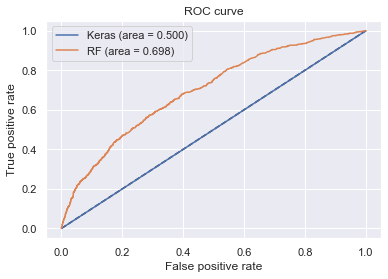

In [51]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

# Confusion Matrix 

In [52]:
# predict probabilities for test set
yhat_probs = model.predict(testX, verbose=0)
# predict crisp classes for test set
yhat_classes = model.predict_classes(testX, verbose=0)

In [53]:
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]

In [54]:
# ROC AUC
auc = roc_auc_score(testy, yhat_probs)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(testy, yhat_classes)
print(matrix)

ROC AUC: 0.448671
[[7058    5]
 [ 839    0]]


In [55]:
#accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(testy, yhat_classes)
print('Accuracy: %f' % accuracy)

Accuracy: 0.893192


In [56]:
print ('Report : ')
print (classification_report(testy, yhat_classes))

Report : 
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      7063
           1       0.00      0.00      0.00       839

    accuracy                           0.89      7902
   macro avg       0.45      0.50      0.47      7902
weighted avg       0.80      0.89      0.84      7902

